### Implementing simple Chatbot Using LangGraph and see how steam works

In [18]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [19]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [20]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
load_dotenv()

os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')
llm = ChatOpenAI(model="gpt-3.5-turbo")

In [21]:
# from langchain_groq import ChatGroq

# llm_groq=ChatGroq(model="qwen-qwq-32b")
# llm_groq.invoke("Hey I am Krish and i like to play cricket")

## Lets start with creating Nodes

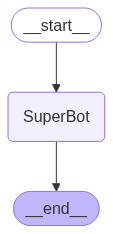

In [22]:
from langgraph.checkpoint.memory import MemorySaver

def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)

memory = MemorySaver()
graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [23]:
## Invocation without streaming
config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Ravi And I am learning AI"},config)

{'messages': [HumanMessage(content='Hi,My name is Ravi And I am learning AI', additional_kwargs={}, response_metadata={}, id='30cc666d-99a0-491f-8583-5bf07cb23a51'),
  AIMessage(content="That's great to hear, Ravi! Artificial intelligence is a fascinating field with so much potential for innovation and growth. If you have any questions or need assistance with your learning journey, feel free to ask. Good luck with your studies!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 19, 'total_tokens': 67, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BZduazVYbm7f44gxbcvyJqXW72STx', 'finish_reason': 'stop', 'logprobs': None}, id='run-9bf21e11-9b85-4f94-8fd2-bce1d9ea501e-0', usage_metadata={'

### Streaming 
Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- **values** : This streams the full state of the graph after each node is called.
- **updates** : This streams updates to the state of the graph after each node is called.

#### Streaming The Responses With Stream Method

In [24]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

# since we are using stream_node as updates : its giving us the last message from the AIMessage
for chunk in graph_builder.stream({'messages':"Hi, I am learning AI"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="That's great! AI is a fascinating field with so many exciting possibilities. What specific areas of AI are you interested in learning about?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 13, 'total_tokens': 40, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BZdubnANePxzNQxyk7g1ryvxJvPQj', 'finish_reason': 'stop', 'logprobs': None}, id='run-82644374-3ce7-43a7-afcf-ea2dfb1d0802-0', usage_metadata={'input_tokens': 13, 'output_tokens': 27, 'total_tokens': 40, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [25]:
for chunk in graph_builder.stream({'messages':"I also like Developing Softwares"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, I am learning AI', additional_kwargs={}, response_metadata={}, id='2a23a132-b284-4d2e-8fe5-25d399b4fd02'), AIMessage(content="That's great! AI is a fascinating field with so many exciting possibilities. What specific areas of AI are you interested in learning about?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 13, 'total_tokens': 40, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BZdubnANePxzNQxyk7g1ryvxJvPQj', 'finish_reason': 'stop', 'logprobs': None}, id='run-82644374-3ce7-43a7-afcf-ea2dfb1d0802-0', usage_metadata={'input_tokens': 13, 'output_tokens': 27, 'total_tokens': 40, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_tok

In [26]:
for chunk in graph_builder.stream({'messages':"I also like cricket "},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="That's great! Cricket is a popular sport with a rich history and a global fan base. It's always nice to have diverse interests and hobbies. If you enjoy cricket, perhaps you could explore the intersection of AI, software development, and cricket – such as analyzing game statistics, creating a cricket prediction model, or developing a cricket-related app. Combining your interests can lead to some unique and interesting projects. Is there a specific way you would like to combine your interests in AI, software development, and cricket?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 103, 'prompt_tokens': 142, 'total_tokens': 245, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'i

In [27]:
for chunk in graph_builder.stream({'messages':"I am also a software engineer"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, I am learning AI', additional_kwargs={}, response_metadata={}, id='2a23a132-b284-4d2e-8fe5-25d399b4fd02'), AIMessage(content="That's great! AI is a fascinating field with so many exciting possibilities. What specific areas of AI are you interested in learning about?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 13, 'total_tokens': 40, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BZdubnANePxzNQxyk7g1ryvxJvPQj', 'finish_reason': 'stop', 'logprobs': None}, id='run-82644374-3ce7-43a7-afcf-ea2dfb1d0802-0', usage_metadata={'input_tokens': 13, 'output_tokens': 27, 'total_tokens': 40, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_tok


#### Streaming The Responses With astream Method

.astream() is an asynchronous generator method that streams the execution of the LangGraph step-by-step, similar to .stream() — but it works with async/await patterns.

**Streaming tokens**
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Containslanggraph_node, the node emitting the event.

In [ ]:
config = {"configurable": {"thread_id": "3"}}

# this helps in debugging 
async for event in graph_builder.astream_events({"messages":["Hi, I am a software engineer learning AI"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi, I am a software engineer learning AI']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '9531a63a-d7f3-452d-8134-5af47240402e', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi, I am learning AI', additional_kwargs={}, response_metadata={}, id='2a23a132-b284-4d2e-8fe5-25d399b4fd02'), AIMessage(content="That's great! AI is a fascinating field with so many exciting possibilities. What specific areas of AI are you interested in learning about?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 13, 'total_tokens': 40, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': Non